In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## Deflategate

In [2]:
football = Table.read_table('football.csv')
football = football.drop('Team')
football.show()

Ball,Blakeman,Prioleau
Patriots 1,11.5,11.8
Patriots 2,10.85,11.2
Patriots 3,11.15,11.5
Patriots 4,10.7,11
Patriots 5,11.1,11.45
Patriots 6,11.6,11.95
Patriots 7,11.85,12.3
Patriots 8,11.1,11.55
Patriots 9,10.95,11.35
Patriots 10,10.5,10.9


In [3]:
initials = np.append(np.ones(11) * 12.5, np.ones(4) * 13)
halftime_wts = (football.column('Blakeman')+football.column('Prioleau'))/2
football = football.with_column(
    'Team', np.char.strip(football.column('Ball'), [' 1234567890']),
    'Weight at Halftime', halftime_wts,
    'Estimate at Start', initials,
    'Drop', initials - halftime_wts
)
football.show()

Ball,Blakeman,Prioleau,Team,Weight at Halftime,Estimate at Start,Drop
Patriots 1,11.5,11.8,Patriots,11.65,12.5,0.85
Patriots 2,10.85,11.2,Patriots,11.025,12.5,1.475
Patriots 3,11.15,11.5,Patriots,11.325,12.5,1.175
Patriots 4,10.7,11,Patriots,10.85,12.5,1.65
Patriots 5,11.1,11.45,Patriots,11.275,12.5,1.225
Patriots 6,11.6,11.95,Patriots,11.775,12.5,0.725
Patriots 7,11.85,12.3,Patriots,12.075,12.5,0.425
Patriots 8,11.1,11.55,Patriots,11.325,12.5,1.175
Patriots 9,10.95,11.35,Patriots,11.15,12.5,1.35
Patriots 10,10.5,10.9,Patriots,10.7,12.5,1.8


In [4]:
# test statistic
def difference_in_average_drop(t):
    averages = t.select('Team', 'Drop').group('Team', np.average).column(1)
    return averages.item(1) - averages.item(0)

observed = difference_in_average_drop(football)
observed

0.733522727272728

In [5]:
football.select('Drop').show()

Drop
0.85
1.475
1.175
1.65
1.225
0.725
0.425
1.175
1.35
1.8


In [6]:
shuffled = football.select('Drop').sample(15, with_replacement=False)
football.select('Team').with_column('Drop', shuffled.column(0))

Team,Drop
Patriots,1.35
Patriots,0.65
Patriots,0.475
Patriots,0.85
Patriots,1.225
Patriots,1.475
Patriots,1.65
Patriots,1.375
Patriots,0.275
Patriots,1.175


In [7]:
sampled_stats = make_array()

for i in np.arange(10000):
    shuffled = football.select('Drop').sample(15, with_replacement=False)
    sample = football.select('Team').with_column('Drop', shuffled.column(0))    
    sampled_stats = np.append(sampled_stats, difference_in_average_drop(sample))

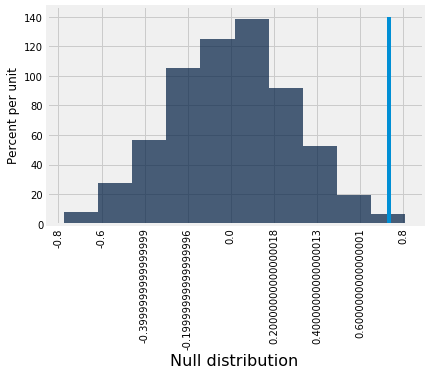

In [8]:
Table().with_column('Null distribution', sampled_stats).hist()
_ = plots.plot([observed, observed], [0, 1.4])

In [9]:
np.count_nonzero(sampled_stats >= observed)/len(sampled_stats)

0.0031